In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import curve_fit
import pandas as pd

# SIR new cases

In [2]:
def sir_model(y, t, beta, gamma, N):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [3]:
def simulate_sir(S0, I0, R0, t, beta, gamma, N):
    y0 = (S0, I0, R0)
    result = odeint(sir_model, y0, t, args=(beta, gamma, N))
    S, I, R = result.T
    return S, I, R

In [13]:
data = pd.read_csv('../Data/silver/zika.csv')  # Replace with your data
t_data = np.arange(1, len(data)+1)
I_data = data['Casos'].values
N = 50_000_000  # Replace with the actual population size

In [15]:
# initial conditions
I0 = I_data[0] # infected
S0 = N - I0 # suceptible
R0 = 0 # recovered / death

In [16]:
# fit function
def fit_function(t, beta, gamma):
    S, I, R = simulate_sir(S0, I0, R0, t, beta, gamma, N)
    return I

In [17]:
beta_guess = 0.5  # Initial guess for transmission rate
gamma_guess = 0.3  # Initial guess for recovery rate
initial_guess = [beta_guess, gamma_guess]

popt, pcov = curve_fit(fit_function, t_data, I_data, p0=initial_guess)
beta_opt, gamma_opt = popt

In [18]:
t_sim = np.linspace(0, t_data[-1], 100)  # Time points for simulation
S_opt, I_opt, R_opt = simulate_sir(S0, I0, R0, t_sim, beta_opt, gamma_opt, N)

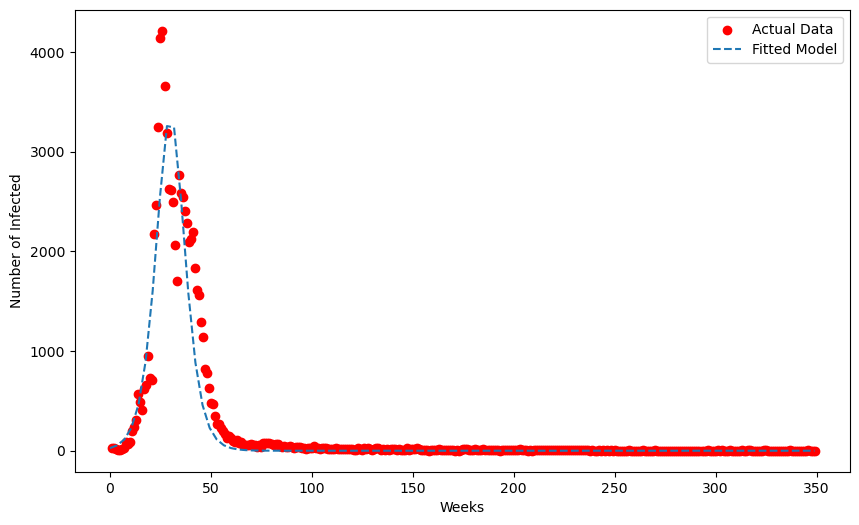

Optimized beta: 18.059333090129005
Optimized gamma: 17.851190890969352
Basic Reproduction Number R0: 1.0116598494986095


In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(t_data, I_data, label='Actual Data', color='red')
plt.plot(t_sim, I_opt, label='Fitted Model', linestyle='dashed')
plt.xlabel('Weeks')
plt.ylabel('Number of Infected')
plt.legend()
plt.show()

print(f"Optimized beta: {beta_opt}")
print(f"Optimized gamma: {gamma_opt}")
print(f"Basic Reproduction Number R0: {beta_opt / gamma_opt}")

# Cumulative

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import curve_fit
import pandas as pd

# Define SIR equations
def sir_model(y, t, beta, gamma, N):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Simulate and return cumulative cases
def simulate_sir(S0, I0, R0, t, beta, gamma, N):
    y0 = (S0, I0, R0)
    result = odeint(sir_model, y0, t, args=(beta, gamma, N))
    S, I, R = result.T
    cumulative = N - S  # Cumulative cases = N - S(t)
    return cumulative, I, R

In [30]:
# Load data
C_data = np.cumsum(I_data)  # Cumulative cases
N = 1e6  # Total population (adjust to your dataset)

# Initial conditions (I0 = first cumulative case, R0 = 0)
I0 = C_data[0]
R0 = 0
S0 = N - I0 - R0

In [31]:
def fit_function(t, beta, gamma):
    cumulative, _, _ = simulate_sir(S0, I0, R0, t, beta, gamma, N)
    return cumulative

In [32]:
# Initial parameter guesses
beta_guess = 0.5  # Transmission rate
gamma_guess = 0.3  # Recovery rate (1/gamma = recovery period in weeks)
initial_guess = [beta_guess, gamma_guess]

# Fit the model
popt, pcov = curve_fit(fit_function, t_data, C_data, p0=initial_guess)
beta_opt, gamma_opt = popt

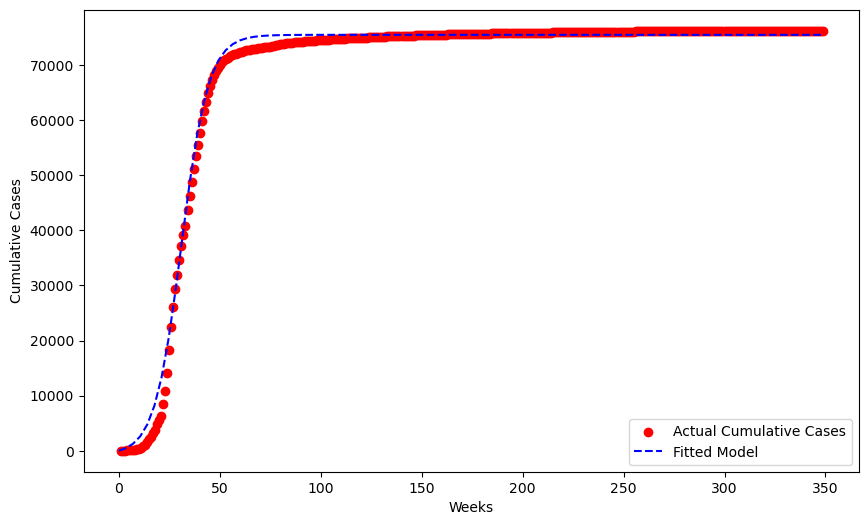

Optimized beta: 3.9524
Optimized gamma: 3.8027
Basic Reproduction Number R0: 1.0394


In [33]:
# Simulate with optimized parameters
t_sim = np.linspace(0, t_data[-1], 100)
cumulative_opt, I_opt, R_opt = simulate_sir(S0, I0, R0, t_sim, beta_opt, gamma_opt, N)

# Plot cumulative cases
plt.figure(figsize=(10, 6))
plt.scatter(t_data, C_data, label='Actual Cumulative Cases', color='red')
plt.plot(t_sim, cumulative_opt, label='Fitted Model', linestyle='--', color='blue')
plt.xlabel('Weeks')
plt.ylabel('Cumulative Cases')
plt.legend()
plt.show()

# Print results
print(f"Optimized beta: {beta_opt:.4f}")
print(f"Optimized gamma: {gamma_opt:.4f}")
print(f"Basic Reproduction Number R0: {beta_opt / gamma_opt:.4f}")